# Build a Classifier

Use the data provided below to train a classifer to detect each class.  Each file is a class.

First train a basic model, and then construct and train a more complex model using class_weights and dropout layers.

Compare the training loss and accuracy values between the two models and discuss the results (in a Markdown Cell is fine.

Include all code and the saved model files in the `zip`.

In [2]:
!wget https://labs-fannie-data.s3.amazonaws.com/q4_l0.csv
!wget https://labs-fannie-data.s3.amazonaws.com/q4_l1.csv
!wget https://labs-fannie-data.s3.amazonaws.com/q4_l2.csv
!wget https://labs-fannie-data.s3.amazonaws.com/q4_l3.csv

--2019-12-08 16:42:13--  https://labs-fannie-data.s3.amazonaws.com/q4_l0.csv
Resolving labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)... 52.216.185.243
Connecting to labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)|52.216.185.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2353657 (2.2M) [text/csv]
Saving to: ‘q4_l0.csv’

q4_l0.csv           100%[===================>]   2.24M  --.-KB/s    in 0.1s    

2019-12-08 16:42:14 (15.5 MB/s) - ‘q4_l0.csv’ saved [2353657/2353657]

--2019-12-08 16:42:14--  https://labs-fannie-data.s3.amazonaws.com/q4_l1.csv
Resolving labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)... 52.216.185.243
Connecting to labs-fannie-data.s3.amazonaws.com (labs-fannie-data.s3.amazonaws.com)|52.216.185.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949440 (927K) [text/csv]
Saving to: ‘q4_l1.csv’

q4_l1.csv           100%[===================>] 927.19

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.models import load_model

In [2]:
class1 = pd.read_csv("https://labs-fannie-data.s3.amazonaws.com/q4_l0.csv",header = None)
class2 = pd.read_csv("https://labs-fannie-data.s3.amazonaws.com/q4_l1.csv",header = None)
class3 = pd.read_csv("https://labs-fannie-data.s3.amazonaws.com/q4_l2.csv",header = None)
class4 = pd.read_csv("https://labs-fannie-data.s3.amazonaws.com/q4_l3.csv",header = None)


In [3]:
class1["label"] = [0]*len(class1) # add lables to the data
class2["label"] = [1]*len(class2)
class3["label"] = [2]*len(class3)
class4["label"] = [3]*len(class4)


In [4]:
data = np.vstack([class1,class2,class3,class4])

In [5]:
np.random.shuffle(data) # randomly rearange the data's order

In [6]:
data = pd.DataFrame(data)

In [7]:
# devide them into training and testing set
prop = 0.8 
train_num = int(prop * len(data))
x_train = np.asarray(data.loc[:train_num,:4])
y_train = np.asarray(data.loc[:train_num,5])
x_test = np.asarray(data.loc[train_num:,:4])
y_test = np.asarray(data.loc[train_num:,5])

## Construct a benchmark model

We now construct a simplest model to do this classification problem.

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((x_test, y_test))

BATCH_SIZE = 250
SHUFFLE_BUFFER_SIZE = 100
V = np.unique(data.loc[:,5])

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(5,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(V), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [37]:
history = model.fit(
    train_dataset, 
    validation_data=test_dataset, 
    epochs=20
)

Epoch 1/20
217/217 [==============================] - 1s 4ms/step - loss: 0.2186 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
217/217 [==============================] - 0s 2ms/step - loss: 0.1041 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.0920 - val_sparse_categorical_accuracy: 0.9679
Epoch 3/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9698
Epoch 4/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9714 - val_loss: 0.0787 - val_sparse_categorical_accuracy: 0.9716
Epoch 5/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9727 - val_loss: 0.0745 - val_sparse_categorical_accuracy: 0.9731
Epoch 6/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0761 - sparse_ca

In [38]:
y_train

array([0., 3., 0., ..., 3., 0., 1.])

In [39]:
x_train

array([[-1.57442155,  3.65447138,  6.20964421,  9.7199759 , 10.32255621],
       [ 6.21467155, -4.02388175,  1.45387188, 10.29425243,  5.47965276],
       [ 0.79306326,  5.49059164,  6.84746149, 10.51498695,  8.91276603],
       ...,
       [ 4.0145821 , -0.90873002,  1.22263901, 10.77851359,  6.85825315],
       [-0.34604713,  6.50190747,  5.85692918, 10.08920578, 11.78477637],
       [ 0.11549312, -4.15694919,  1.96438559, 10.54794232,  5.19900223]])

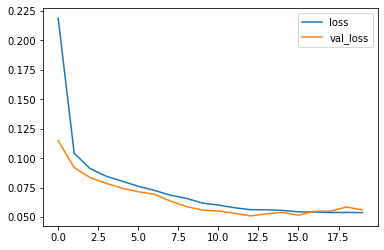

In [40]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

In [45]:
model.save("base_model.h5")

## Construct an advanced model

We add the class weights into the model, the weights are the 1-frequency of the labeled data. Then we use dropout method to prevent the overfitting and the rate of the dropout are 0.3 for the first layer and 0.1 for the next layer.

In [41]:
V, C = np.unique(data.loc[:,5], return_counts=True)

class_weights = {}

for v, c in zip(V, C):
    prop = c / len(data.loc[:,5])
    print(v, " | ", c)
    class_weights[v] = 1 - prop

0.0  |  25437
1.0  |  10320
2.0  |  1930
3.0  |  30000


In [42]:

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(5,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(V), activation='softmax')
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)
history2 = model2.fit(
    train_dataset, 
    validation_data=test_dataset,
    class_weight = class_weights,
    epochs=20
)


Epoch 1/20
217/217 [==============================] - 1s 5ms/step - loss: 0.3081 - sparse_categorical_accuracy: 0.9056 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/20
217/217 [==============================] - 1s 3ms/step - loss: 0.1322 - sparse_categorical_accuracy: 0.9589 - val_loss: 0.0971 - val_sparse_categorical_accuracy: 0.9669
Epoch 3/20
217/217 [==============================] - 1s 3ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.0893 - val_sparse_categorical_accuracy: 0.9688
Epoch 4/20
217/217 [==============================] - 1s 3ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.0853 - val_sparse_categorical_accuracy: 0.9699
Epoch 5/20
217/217 [==============================] - 1s 3ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.0805 - val_sparse_categorical_accuracy: 0.9711
Epoch 6/20
217/217 [==============================] - 1s 3ms/step - loss: 0.0942 - sparse_ca

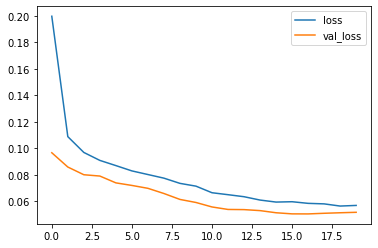

In [33]:
plt.plot(history2.history["loss"],label="loss")
plt.plot(history2.history["val_loss"],label="val_loss")
plt.legend()

In [46]:
model2.save("advanced_model.h5")

## Conclusion

From the results above, we can tell the final version of the basic model's accuracy in test set is 0.0561 and those of advanced model is 0.0528. The loss of the second model is little less than the first one and the curve of validation set loss in the second one is platten than the first one which means that the overfitting issue is settled partially. The following plot is the accuracy of the two models over training epochs.

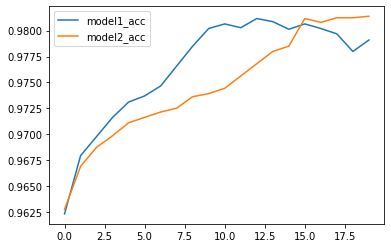

In [44]:
plt.plot(history.history["val_sparse_categorical_accuracy"],label="model1_acc")
plt.plot(history2.history["val_sparse_categorical_accuracy"],label="model2_acc")
plt.legend()

If you want to load the model, you can just call the load_model function to read the h5 file

In [50]:
model_loaded = load_model('advanced_model.h5')

In [52]:
print(model_loaded)